Задание 3. Python и анализ данных
Датасет представляет собой информацию по рынку недвижимости.

Ссылка на датасет: 
https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

Необходимо провести мини-исследование датасета с помощью pandas, matplotlib, seaborn, plotly и других инструментов, а также:
1.	Предобработать и почистить данные, заполнить пропуски
2.	Определить, какие регионы лидируют по цене. Для каждого региона найти среднюю цену квартиры.
3.	Выявить закономерность влияния на цену площади, числа комнат и площади кухни. Влияют ли параметры на цены по регионам? Как можно предсказать цену по входящим параметрам недвижимости?
4.	Постройте модель (любую), предсказывающую цену по входящим параметрам недвижимости?

Выявление дополнительных инсайтов будет плюсом. Для каждого пункта необходимо предоставить график с выводами.

Датасет содержит 13-ть полей:

 - date - дата публикации объявления
 - time - время, когда объявление было опубликовано
 - geo_lat - широта
 - geo_lon - долгота
 - region - регион России. Всего в стране 85 субъектов
 - building_type - тип фасада. 0 - Другое. 1 - Панельный. 2 - Монолитный. 3 - Кирпичный. 4 - Блочный. 5 - Деревянный
 - object_type - тип квартиры. 1 - Вторичный рынок недвижимости; 2 - Новостройка
 - level - этаж квартиры
 - levels - количество этажей
 - rooms - количество жилых комнат. Если значение равно "-1", то это означает "однокомнатная квартира"
 - area - общая площадь квартиры
 - kitchen_area - площадь кухни
 - price - цена в рублях

In [443]:
# установим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## 1. Предобработка и очистка данных

In [ ]:
# загружаем датасет
df = pd.read_csv('/home/user/Рабочий стол/vs_code/all_v2.csv')

In [445]:
# создадим функцию, которая покажет всю общую информацию о датасете
def show_info(df_name):  
    display(df_name.head(10))
    print('-------------------------------------------')
    print(df_name.info())
    print('-------------------------------------------')
    print(df_name.describe())
    print('-------------------------------------------')
    df_name.hist(figsize=(15, 20));

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,1
1,8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,1
2,4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,1
3,1850000,2018-03-01,11:24:52,45.00,39.07,2843,4,12,16,2,38.00,5.00,11
4,5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,1
5,3300000,2018-03-02,21:18:42,55.91,37.73,81,1,4,5,1,32.00,6.00,1
6,4704280,2018-03-04,12:35:25,55.62,37.43,3,2,1,25,1,31.70,6.00,11
7,3600000,2018-03-04,20:52:38,59.88,30.40,2661,1,2,5,1,31.10,6.00,1
8,3390000,2018-03-05,07:07:05,53.20,50.11,3106,2,4,24,2,64.00,13.00,11
9,2800000,2018-03-06,09:57:10,55.74,38.85,81,1,9,10,2,55.00,8.00,1


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB
None
-------------------------------------------
               price    geo_lat    geo_lon     region  building_type  \
count     5477006.00 5477006.00 5477006.00 5477006.00     5477006.00   
mean      4422029.02      54.04      53.24    4307.14           1.95   
std      21507519.15       4.62      20.75    3308.05           1.04   
min   -2144967296.00  

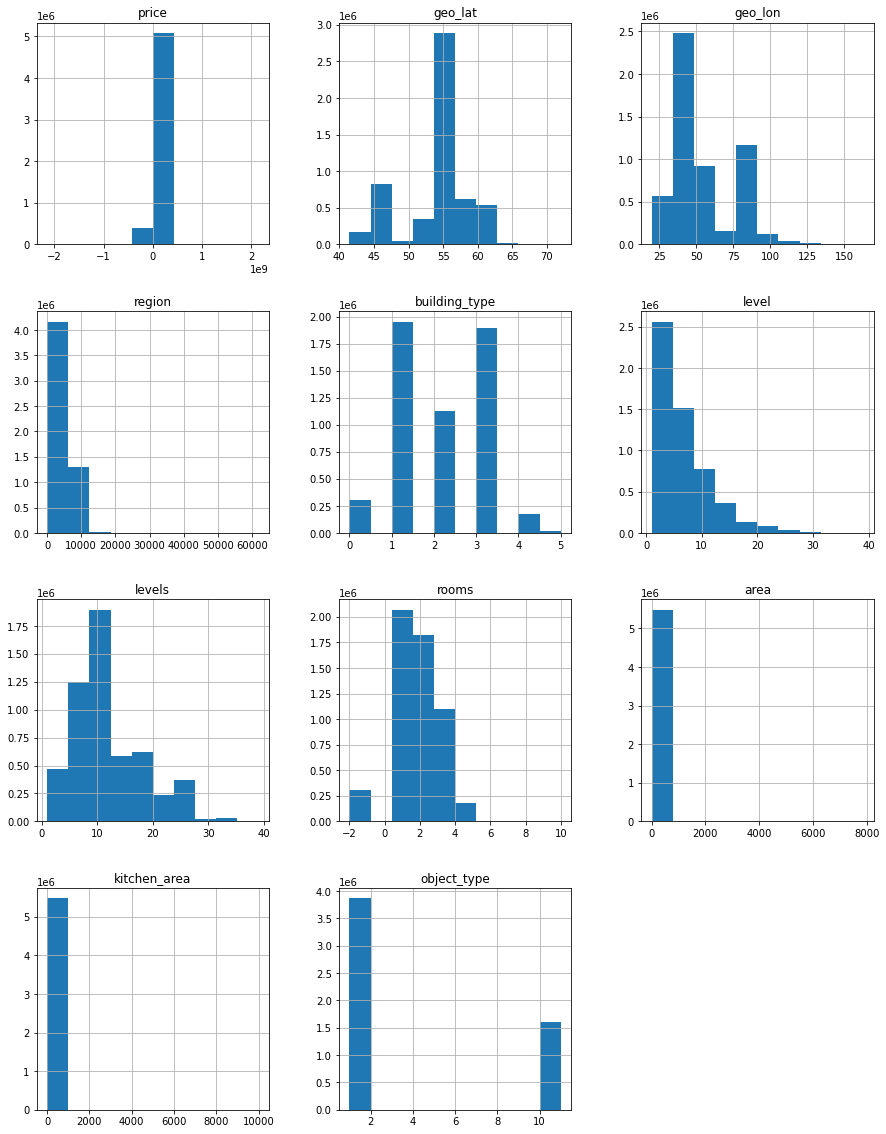

In [446]:
# посмотрим на датасет
show_info(df)

In [447]:
print('Количество пропусков:', df.isna().sum())


Количество пропусков: price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64


In [448]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 1523


In [449]:
# посмотрим на дубликаты и увидим, что строки действительно повторяются
df[df.duplicated()].sort_values(['geo_lat', 'geo_lon'])

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
874326,4700000,2019-01-01,03:34:59,44.04,43.06,2900,3,1,1,2,76.00,20.00,1
727930,1300000,2018-12-13,20:42:16,44.09,43.09,2900,3,1,2,2,44.50,6.00,1
4832057,3560000,2020-12-10,00:50:30,44.67,37.77,2843,4,1,16,2,61.30,11.90,11
3912894,1953600,2020-06-17,21:59:21,44.99,39.07,2843,2,3,18,1,40.70,10.10,11
3912895,1953600,2020-06-17,21:59:21,44.99,39.07,2843,2,3,18,1,40.70,10.10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302334,4533560,2020-02-18,22:40:09,61.25,73.43,2484,2,16,20,2,64.10,18.30,11
3302336,4410610,2020-02-18,22:40:09,61.25,73.43,2484,2,6,20,2,63.20,17.70,11
3302344,4533560,2020-02-18,22:40:09,61.25,73.43,2484,2,19,20,2,64.10,18.30,11
3302350,3388000,2020-02-18,22:40:09,61.25,73.43,2484,2,17,20,1,46.30,15.80,11


In [450]:
print('Уникальные значения в столбце регионы:', df['region'].unique())
print('-------------------------------------------')
print('Уникальные значения в столбце комнаты:', df['rooms'].unique())
print('-------------------------------------------')
print('Уникальные значения в столбце тип объекта:', df['object_type'].unique())

Уникальные значения в столбце регионы: [ 2661    81  2871  2843     3  3106  2922  2900  2722  6171  3230  4417
  5282  5368  3446  5520  6817  9579  2604  1010  9648  7793 13919  2860
  3019  4982  5241  3870  3991  2359  9654  2072  8090  4007 11171 10160
  7873  2594  8509 11416 11991  2880  5178 13913  6309  5952  6543  2328
  5993  2484 13098  4240  5789  1901 14880 10201  1491  2885  5794  2528
  4374  4695  5143  6937  2806 14368  5736  7121  4086   821 10582  7896
  8640  5703  8894  4249  3153  4189  2814  7929 16705    69  4963 61888]
-------------------------------------------
Уникальные значения в столбце комнаты: [ 3  2  1  4 -1  5  7  6  8  9 -2 10]
-------------------------------------------
Уникальные значения в столбце тип объекта: [ 1 11]


Итак первоначальная проверка выявила:
- неверные типы данных в поле date
- есть 1523 дубликата
- некорректные значения типов объектов и количества комнат
- также нужно проверить чтобы этаж не превышал общее количество этажей в доме и площадь кухни - общую площадь
- проверить аномально большое количество комнат, цен, при необходимости удалить значения

In [451]:
# удалим дубликаты тем более, что их мало относительно всего датасета
df = df.drop_duplicates()
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


In [452]:
# исправим тип объекта равный "11" на "2", как это указано в описании
df[df['object_type'] == 11] = 2

# исправим значения комнат "-1" на "1" и "-2" на "2", аналогично описанию данных
df[df['rooms'] == -1] = 1
df[df['rooms'] == -2] = 2

In [453]:
# посмотрим сколько строк имеют значение этажа выше общего числа в доме
print('Число строк, где этаж больше, чем число этажей в доме:', df['level'].where(df['level'] > df['levels']).count())

# посмотрим сколько строк имеют значение площади кухни больше общей площади
print('Число строк, где кухня больше, чем общая площадь:', df['kitchen_area'].where(df['kitchen_area'] > df['area']).count())

Число строк, где этаж больше, чем число этажей в доме: 1030
Число строк, где кухня больше, чем общая площадь: 2415


In [454]:
# удалим эти аномалии из датасета
df = df[~((df['level'] > df['levels']) | (df['kitchen_area'] > df['area']))]

In [455]:
# взглянем на новостройки и заметим, что все данные по ним "мусорные"
df.query('object_type == 2')

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
3,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
6,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
8,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
10,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
11,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476997,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
5477001,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
5477002,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2
5477004,2,2,2,2.00,2.00,2,2,2,2,2,2.00,2.00,2


Мы обнаружили, что в данных очень много строк, у которых нет логического объяснения. Чтобы от них избавиться подумаем о следующем. При наличии двух и более комнат у нас общая площадь равна площади кухни. Встретить такое в реальной жизни маловероятно. И учитывая, что в дальнейшем будем строить прогнозную модель, мы будем руководствоваться принципом "лучше меньше, да лучше" и удалим эти данные из датасета.

In [456]:
df['kitchen_area'].where((df['kitchen_area'] == df['area']) & (df['rooms']>=2)).count()

1612435

In [457]:
# удалим эти аномалии из датасета
df = df[~((df['kitchen_area'] == df['area']) & (df['rooms']>=2))]

In [458]:
# взглянем на цены и заметим, что есть отрицательные значения
df['price'].describe()

count       3859604.00
mean        4209936.60
std        14056611.93
min     -2144967296.00
25%         1900000.00
50%         2900000.00
75%         4560000.00
max      2147483647.00
Name: price, dtype: float64

In [459]:
# найдем число аномально высоких цен и низких цен (в т.ч. отрицательных)
df['price'].where((df['price'] > 20_000_000) | (df['price'] < 1_000_000 )).count()

322600

In [460]:
# мы могли бы заменить отрицательные значения, но нам доподлино не известно как и почему появился минус в данных
# поэтому удалим аномалии из датасета с очень низкими и очень высокими ценами. Оставим цены в диапазоне от 1 млн.руб. до 20 млн.руб.
df = df[~((df['price'] > 20_000_000) | (df['price'] < 1_000_000 ))]

In [461]:
# взглянем на общую площадь
df['area'].describe()

count   3537004.00
mean         54.07
std          30.07
min           0.32
25%          39.35
50%          48.95
75%          63.00
max        7856.00
Name: area, dtype: float64

In [462]:
# оставим в датасете только те строки, где площадь не более 150 метров квадратных. 
df = df[~(df['area'] > 150)]

In [463]:
# посмотрим на статистику по числу комнат. И заметим, что значения больше 6 явно являются аномалиями.
df['rooms'].describe()

count   3520261.00
mean          1.93
std           0.87
min           1.00
25%           1.00
50%           2.00
75%           3.00
max           9.00
Name: rooms, dtype: float64

In [464]:
# оставим в датасете только те строки, где число комнат не более 6. 
df = df[~(df['rooms'] > 6)]

In [465]:
# дополним наши данные ценой за метр квадратный
df['price_by_meter'] = round(df['price'] / df['area'], 2)

Также дополним наши данные классами обекта недвижимости по цене:

 - если цена до 3 млн - бюджетный вариант - "4"
 - если цена от 3 млн до 6 млн - эконом вариант - "3"
 - если цена от 6 млн до 10 млн- премиум вариант - "2"
 - если цена от 10 млн - ВИП вариант - "1"

Напишем функцию и дополним данные

In [466]:
def class_of_object (price):
    try:
        if price < 3_000_000:
            return '4'
        elif 3_000_000 <= price < 6_000_000:
            return '3'
        elif 6_000_000 <= price < 10_000_000:
            return '2'
        else:
            return '1'
    except:
        pass

In [467]:
df['class_object'] = df['price'].apply(class_of_object).astype(int)

In [468]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_by_meter,class_object
0,6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,1,73244.55,2
1,8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,1,125180.90,2
2,4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,1,60606.06,3
4,5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,1,90833.33,3
5,3300000,2018-03-02,21:18:42,55.91,37.73,81,1,4,5,1,32.00,6.00,1,103125.00,3


<AxesSubplot:>

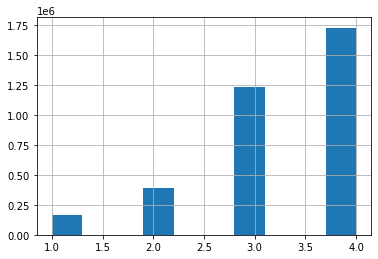

In [469]:
df['class_object'].hist()

In [470]:
# исправим тип данных в поле date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_by_meter,class_object
0,6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,1,73244.55,2
1,8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,1,125180.90,2
2,4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,1,60606.06,3
4,5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,1,90833.33,3
5,3300000,2018-03-02,21:18:42,55.91,37.73,81,1,4,5,1,32.00,6.00,1,103125.00,3
7,3600000,2018-03-04,20:52:38,59.88,30.40,2661,1,2,5,1,31.10,6.00,1,115755.63,3
9,2800000,2018-03-06,09:57:10,55.74,38.85,81,1,9,10,2,55.00,8.00,1,50909.09,4
16,4550000,2018-03-12,12:37:08,55.74,49.23,2922,3,6,10,2,54.20,11.40,1,83948.34,3
17,2880000,2018-03-15,14:38:45,55.73,52.37,2922,1,8,10,2,51.00,8.00,1,56470.59,4
18,1450000,2018-03-16,14:51:58,45.07,41.94,2900,1,9,10,1,43.00,9.00,1,33720.93,4


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520016 entries, 0 to 5477003
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   price           int64         
 1   date            datetime64[ns]
 2   time            object        
 3   geo_lat         float64       
 4   geo_lon         float64       
 5   region          int64         
 6   building_type   int64         
 7   level           int64         
 8   levels          int64         
 9   rooms           int64         
 10  area            float64       
 11  kitchen_area    float64       
 12  object_type     int64         
 13  price_by_meter  float64       
 14  class_object    int64         
dtypes: datetime64[ns](1), float64(5), int64(8), object(1)
memory usage: 429.7+ MB
None
-------------------------------------------
            price    geo_lat    geo_lon     region  building_type      level  \
count  3520016.00 3

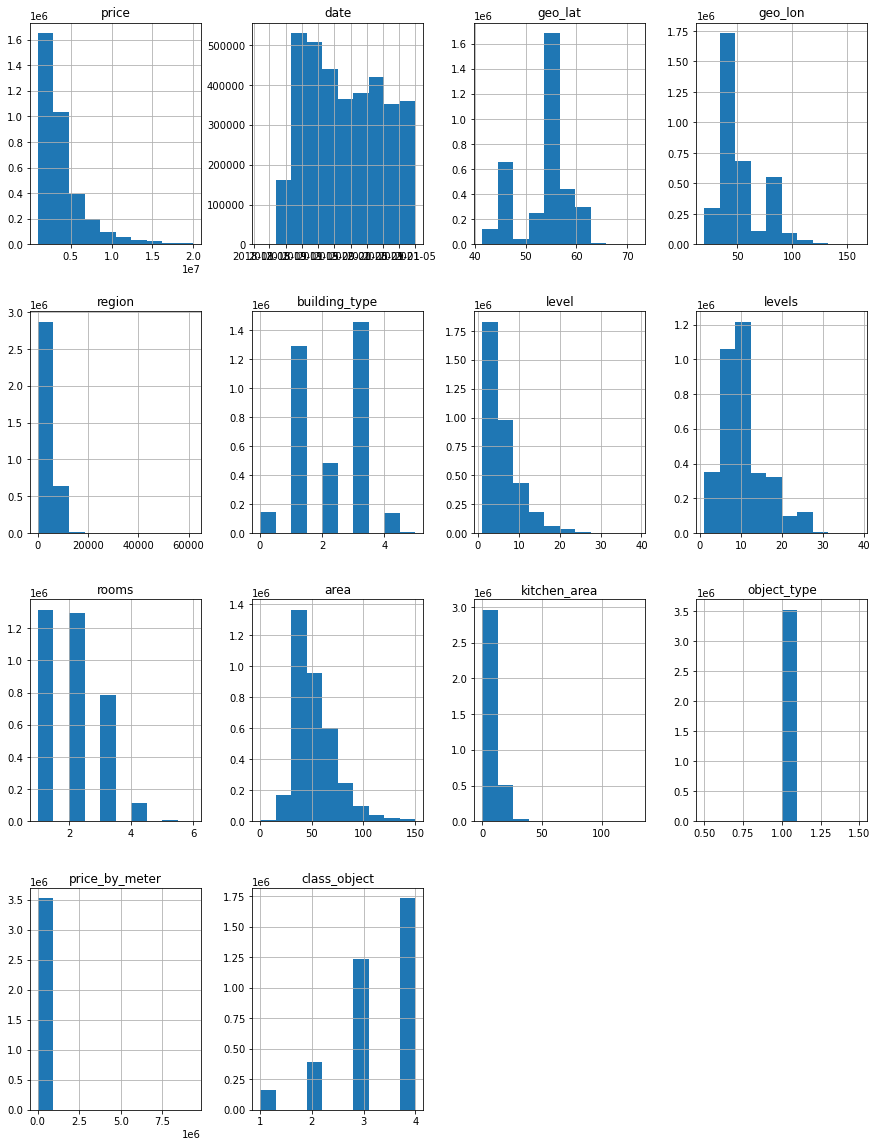

In [471]:
show_info(df)

In [472]:
# еще раз взглянем на наличие новостроек
df['object_type'].unique()

array([1])

Так мы обнаружили, что все данные по новостройкам оказались "мусорными". Удалим столбец 'object_type' т.к. в нем нет смысла и все условно чистые данные являются данными о вторичном рынке недвижимости.

In [473]:
df = df.drop(columns=['object_type'])

In [474]:
df.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,price_by_meter,class_object
0,6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,73244.55,2
1,8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,125180.90,2
2,4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,60606.06,3
4,5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,90833.33,3
5,3300000,2018-03-02,21:18:42,55.91,37.73,81,1,4,5,1,32.00,6.00,103125.00,3
7,3600000,2018-03-04,20:52:38,59.88,30.40,2661,1,2,5,1,31.10,6.00,115755.63,3
9,2800000,2018-03-06,09:57:10,55.74,38.85,81,1,9,10,2,55.00,8.00,50909.09,4
16,4550000,2018-03-12,12:37:08,55.74,49.23,2922,3,6,10,2,54.20,11.40,83948.34,3
17,2880000,2018-03-15,14:38:45,55.73,52.37,2922,1,8,10,2,51.00,8.00,56470.59,4
18,1450000,2018-03-16,14:51:58,45.07,41.94,2900,1,9,10,1,43.00,9.00,33720.93,4


In [475]:
# дополним наши данные: укажем отдельно день, месяц, год, и удалим время, т.к. оно мало применимо в следующем анализе 
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)
df['day'] = df['date'].dt.day.astype(int)

df = df.drop(columns=['date', 'time'])

Регионы в датасете представлены в числовом виде, причем не общепринятом (это не код региона и не почтовый индекс). Поэтому создадим еще один столбец - region_name, где будут хранится именно географические названия регионов.

In [476]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область', 
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область', 
    '4417': 'Республика Коми', 
    '5282': 'Челябинская область', 
    '5368': 'Иркутская область', 
    '5520': 'Пермский край', 
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ',
    '7873' : 'Севастополь'
}

In [477]:
# создадим новый столбец
df["region"] = df["region"].astype(str)
df['region_name'] = df['region'].map(region_name)

In [478]:
df = df.drop(columns=['region'])

In [479]:
df.head()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,price_by_meter,class_object,year,month,day,region_name
0,6050000,59.81,30.38,1,8,10,3,82.60,10.80,73244.55,2,2018,2,19,Санкт-Петербург
1,8650000,55.68,37.30,3,5,24,2,69.10,12.00,125180.90,2,2018,2,27,Московская область
2,4000000,56.30,44.06,1,5,9,3,66.00,10.00,60606.06,3,2018,2,28,Нижегородская область
4,5450000,55.92,37.98,3,13,14,2,60.00,10.00,90833.33,3,2018,3,1,Московская область
5,3300000,55.91,37.73,1,4,5,1,32.00,6.00,103125.00,3,2018,3,2,Московская область


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520016 entries, 0 to 5477003
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   price           int64  
 1   geo_lat         float64
 2   geo_lon         float64
 3   building_type   int64  
 4   level           int64  
 5   levels          int64  
 6   rooms           int64  
 7   area            float64
 8   kitchen_area    float64
 9   price_by_meter  float64
 10  class_object    int64  
 11  year            int64  
 12  month           int64  
 13  day             int64  
 14  region_name     object 
dtypes: float64(5), int64(9), object(1)
memory usage: 429.7+ MB


Вывод: Нам удалось очистить датасет от мусорных данных, дополнить новой информацией, привести в порядок типы данных и избавиться от дубликатов. Можно перейти к следующему этапу.

## 2. Определить, какие регионы лидируют по цене. 
## Для каждого региона найти среднюю цену квартиры.

In [481]:
# найдем среднюю цену для каждого региона
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = df.groupby('region_name')['price'].agg('mean').reset_index()
data.columns = ['region', 'mean_price']
data

,region,mean_price
0,Алтайский край,2329631.31
1,Амурская область,4768258.30
2,Архангельская область,3514967.09
3,Астраханская область,2796600.96
4,Белгородская область,3281047.12
...,...,...
79,Челябинская область,2050371.08
80,Чеченская Республика,2627770.75
81,Чувашская Республика,2414266.16
82,Ямало-Ненецкий автономный округ,4103691.86


In [482]:
# найдем ТОП-10 регионов по средней цене
data.sort_values(by='mean_price', ascending=False).head(10)

,region,mean_price
29,Москва,9961415.80
63,Санкт-Петербург,6922047.52
67,Севастополь,5559043.46
15,Калининградская область,5488415.71
1,Амурская область,4768258.30
52,Республика Крым,4762016.68
30,Московская область,4592148.27
78,Ханты-Мансийский автономный округ,4243425.55
82,Ямало-Ненецкий автономный округ,4103691.86
26,Ленинградская область,3899149.68


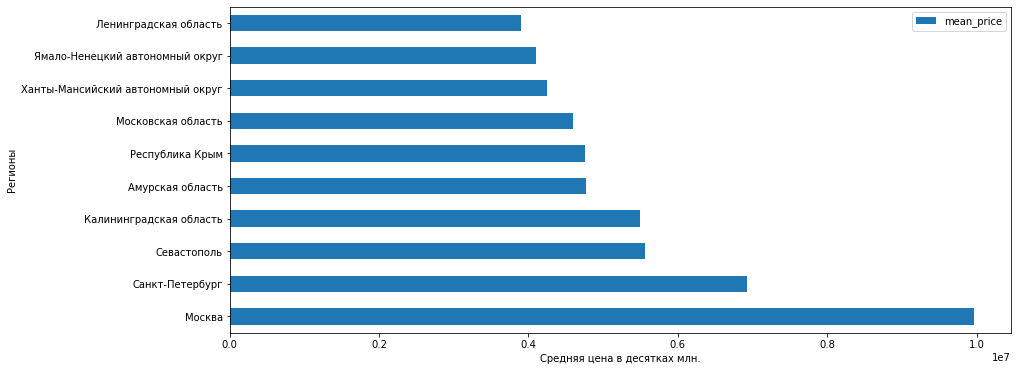

In [483]:
data.sort_values(by='mean_price', ascending=False).head(10).plot(kind='barh', figsize=(14, 6), x='region', y='mean_price')
plt.xlabel('Средняя цена в десятках млн.')
plt.ylabel('Регионы')
plt.show()

## 3. Выявить закономерность влияния на цену площади, числа комнат и площади кухни. 
### Влияют ли параметры на цены по регионам? 
### Как можно предсказать цену по входящим параметрам недвижимости?

Чтобы понять как признаки влияют друг на друга, какова их взаимосвязь и по каким параметрам можно предсказать цену - можно построить тепловую карту данных.

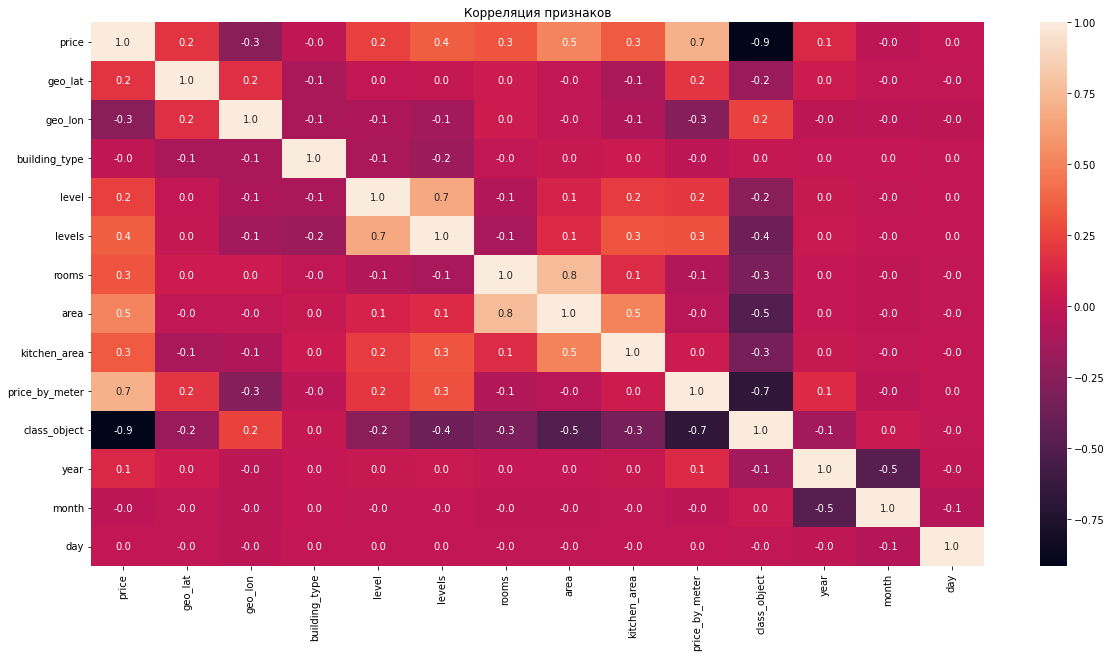

In [484]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Корреляция признаков')
plt.show()

Мы видим сильную взаимосвязь между ценой и ценой за квадратный метр, классом объекта и ценой. Пускай нас не смущает отрицательная корреляция в последнем. Все потому, что у классификации обратный порядок: чем дороже объект, тем класс ближе к единице (у ВИП класса он равен 1).

Взглянем на распределения данных подробнее.

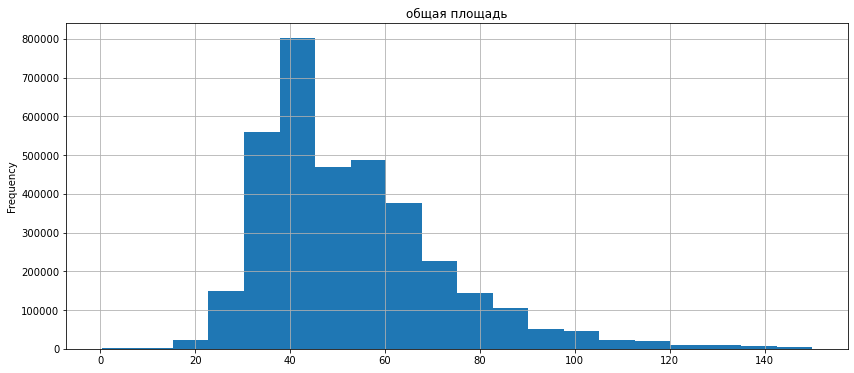

In [485]:
df['area'].plot(kind='hist', title='общая площадь', grid=True, figsize=(14, 6), bins=20);

Вывод: Основная масса квартир в датасете имеет общую площадь от 30 до 60 квадратных метров.

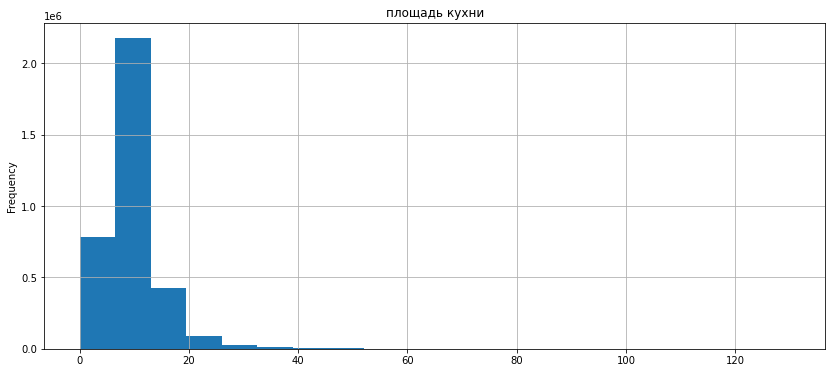

In [486]:
df['kitchen_area'].plot(kind='hist', title='площадь кухни', grid=True, figsize=(14, 6), bins=20);

Вывод: Основная масса квартир в датасете имеет площадь кухни в диапазоне от 5 до 15 квадратных метров.

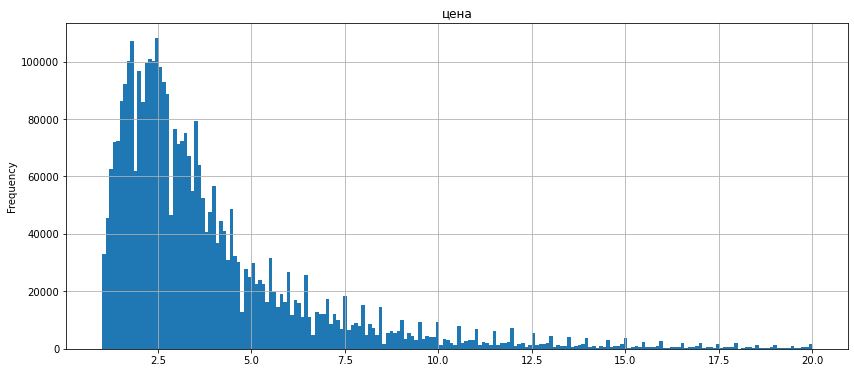

In [487]:
(df['price']/1_000_000).plot(kind='hist', title='цена', grid=True, figsize=(14, 6), bins=200);

Вывод: Основная масса квартир в датасете продавалась от 2 до 5 млн.руб.

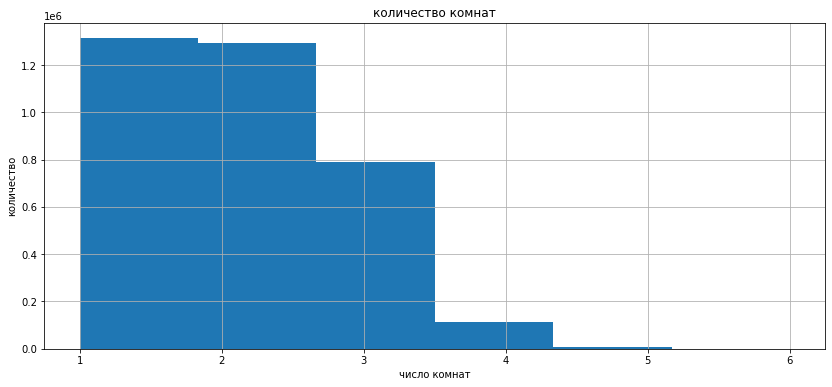

In [488]:
df['rooms'].plot(kind='hist', title='количество комнат', grid=True, bins=6, figsize=(14, 6))
plt.xlabel('число комнат')
plt.ylabel('количество')
plt.show()

Вывод: Больше всего данных в датасете о продажах одно- и двухкомнатных квартир

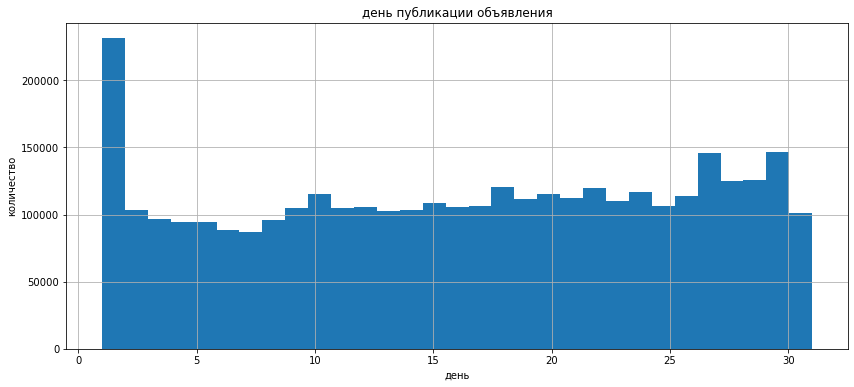

In [489]:
df['day'].plot(kind='hist', title='день публикации объявления', grid=True, bins=31, figsize=(14, 6))
plt.xlabel('день')
plt.ylabel('количество')
plt.show()

Вывод: Чаще всего объявления о продаже квартир публикуются в начале и в конце месяца. Особенно выделяется первое число месяца.

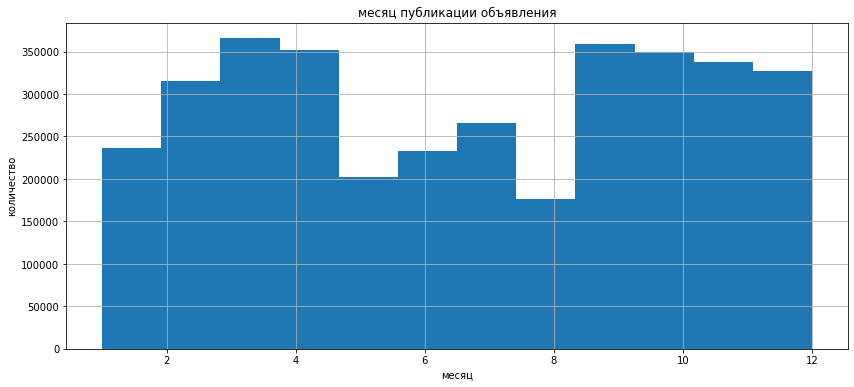

In [490]:
df['month'].plot(kind='hist', title='месяц публикации объявления', grid=True, bins=12, figsize=(14, 6))
plt.xlabel('месяц')
plt.ylabel('количество')
plt.show()

Вывод: Реже всего объявления публикуются летом и в начале года. Чаще всего квартиры выставляют на продажу весной и осенью.

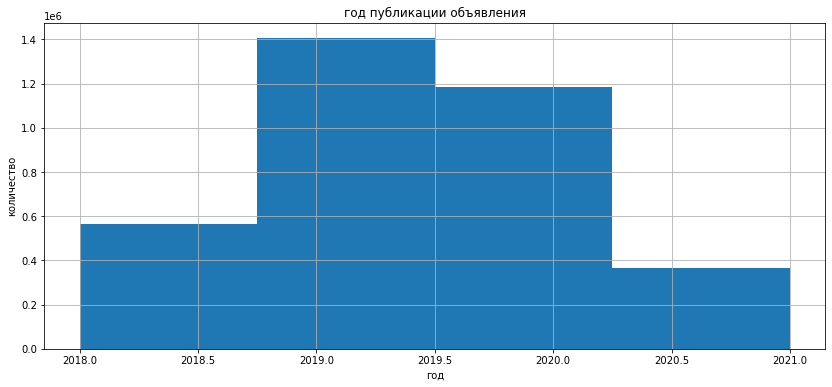

In [491]:
df['year'].plot(kind='hist', title='год публикации объявления', grid=True, bins=4, figsize=(14, 6))
plt.xlabel('год')
plt.ylabel('количество')
plt.show()

Вывод: В датасете больше всего данных о продаже квартир в 2019 году, меньше всего 2021.

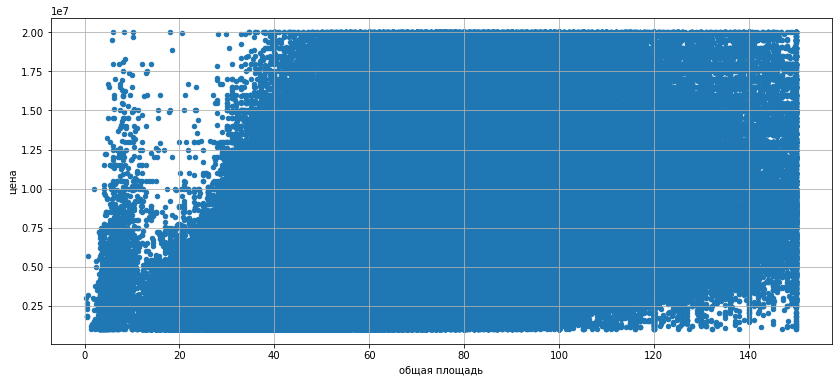

In [492]:
df.sort_values('area').plot(x='area', y='price', grid=True, figsize=(14, 6), kind='scatter')
plt.xlabel('общая площадь')
plt.ylabel('цена')
plt.show()

In [493]:
print('Корреляция между ценой и общей площадью равна:', round(df['price'].corr(df['area']), 2))

Корреляция между ценой и общей площадью равна: 0.51


Вывод: Взаимосвязь между ценой и общей площадью существует. Она довольно сильная. Но, как можем видеть на графике, есть небольшие по площади квартиры, которые стоят очень дорого. Возможно все зависит от расположения жилья и других факторов.

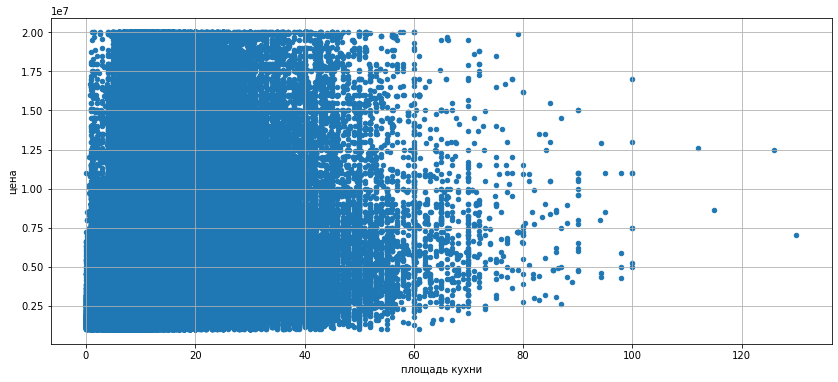

In [494]:
df.sort_values('kitchen_area').plot(x='kitchen_area', y='price', grid=True, figsize=(14, 6), kind='scatter')
plt.xlabel('площадь кухни')
plt.ylabel('цена')
plt.show()

In [495]:
print('Корреляция между ценой и площадью кухни равна:', round(df['price'].corr(df['kitchen_area']), 2))

Корреляция между ценой и площадью кухни равна: 0.34


Вывод: Взаимосвязь между ценой и площадью кухни существует. Но она довольно слабая. Чем дороже квартира, тем вовсе не обязательно будет больше площадь кухни.

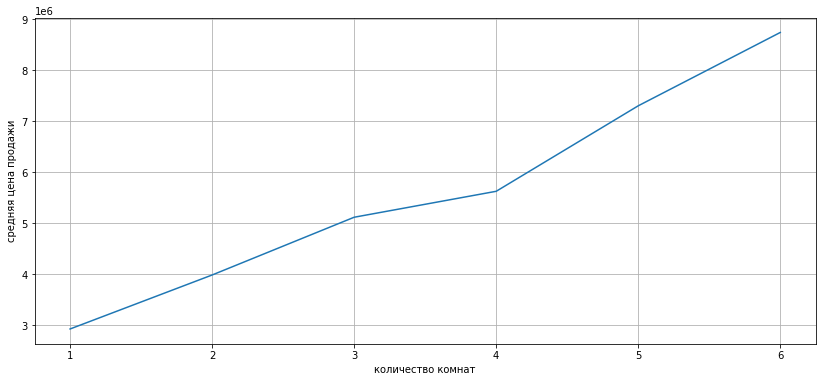

In [496]:
df.groupby('rooms')['price'].agg('mean').plot(x='rooms', y='price', grid=True, figsize=(14, 6))
plt.xlabel('количество комнат')
plt.ylabel('средняя цена продажи')
plt.show()

In [497]:
print('Корреляция между ценой и числом комнат равна:', round(df['price'].corr(df['area']), 2))

Корреляция между ценой и числом комнат равна: 0.51


Вывод: Взаимосвязь между ценой и количеством комнат разумеется существует. Взаимосвязь сильная. Чем больше комнат, тем дороже квартира. Особенно заметна тенденция к росту цены после 4-х комнат. 

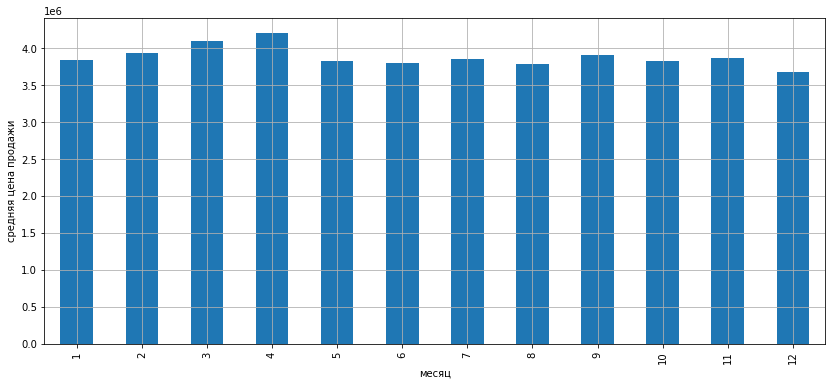

In [498]:
df.groupby('month')['price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 6))
plt.xlabel('месяц')
plt.ylabel('средняя цена продажи')
plt.show()

Вывод: Рассматривая изменения средней цены по месяцам можно заметить сезонность. Цены на жилье растут с января по апрель. А летом практически не меняются.

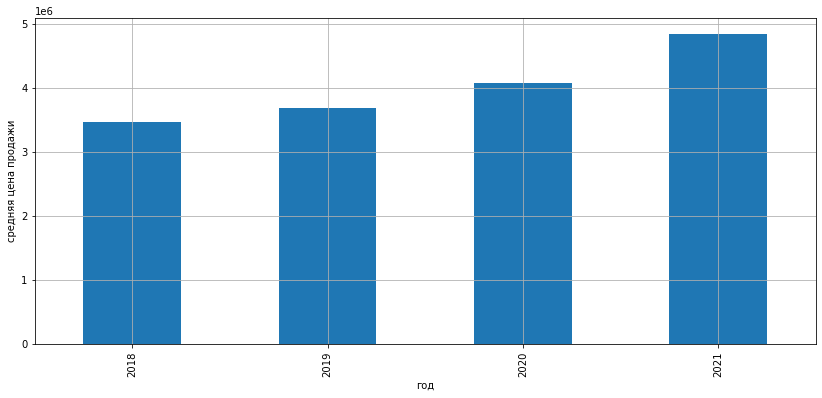

In [499]:
df.groupby('year')['price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 6))
plt.xlabel('год')
plt.ylabel('средняя цена продажи')
plt.show()

Вывод: Рассматривая изменения средней цены по годам, мы можем увидеть, как средняя стоимость жилья растет от года к году.

Теперь посмотрим как изменялись цены в зависимости от регионов.

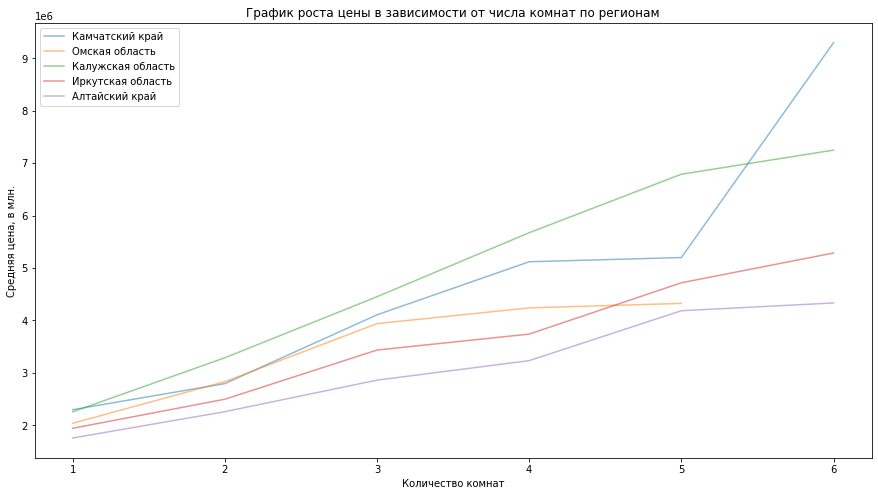

In [500]:
plt.subplots(figsize=(15, 8))
plt.plot(df.query('region_name == "Камчатский край"').groupby('rooms')['price'].agg('mean'), alpha = 0.5, label='Камчатский край')
plt.plot(df.query('region_name == "Омская область"').groupby('rooms')['price'].agg('mean'), alpha = 0.5, label='Омская область')
plt.plot(df.query('region_name == "Калужская область"').groupby('rooms')['price'].agg('mean'), alpha = 0.5, label='Калужская область')
plt.plot(df.query('region_name == "Иркутская область"').groupby('rooms')['price'].agg('mean'), alpha = 0.5, label='Иркутская область')
plt.plot(df.query('region_name == "Алтайский край"').groupby('rooms')['price'].agg('mean'), alpha = 0.5, label='Алтайский край')
plt.title('График роста цены в зависимости от числа комнат по регионам')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена, в млн.')
plt.legend()
plt.show()

Как можем наблюдать рост цены в зависимости от количества комнат характерен для всех регионов.

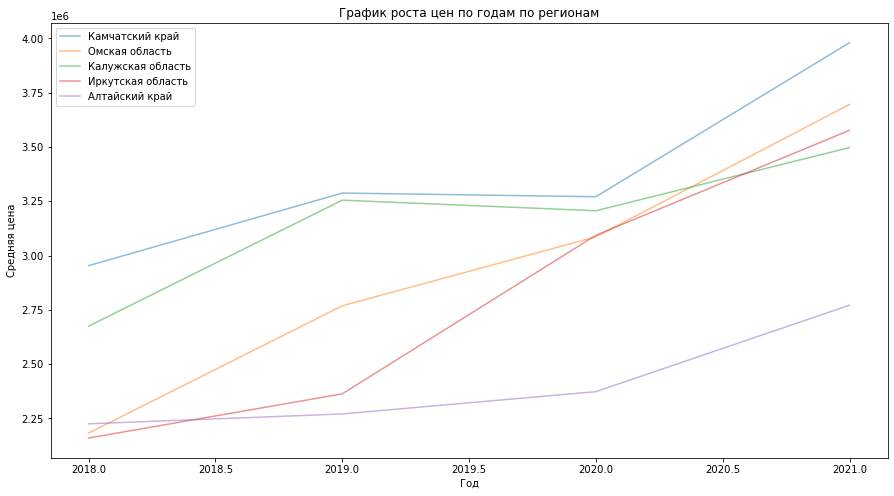

In [501]:
plt.subplots(figsize=(15, 8))
plt.plot(df.query('region_name == "Камчатский край"').groupby('year')['price'].agg('mean'), alpha = 0.5, label='Камчатский край')
plt.plot(df.query('region_name == "Омская область"').groupby('year')['price'].agg('mean'), alpha = 0.5, label='Омская область')
plt.plot(df.query('region_name == "Калужская область"').groupby('year')['price'].agg('mean'), alpha = 0.5, label='Калужская область')
plt.plot(df.query('region_name == "Иркутская область"').groupby('year')['price'].agg('mean'), alpha = 0.5, label='Иркутская область')
plt.plot(df.query('region_name == "Алтайский край"').groupby('year')['price'].agg('mean'), alpha = 0.5, label='Алтайский край')
plt.title('График роста цен по годам по регионам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.legend()
plt.show()

Также мы можем наблюдать рост цен на недвижимость во всех (выбранных нами) регионах. Лишь на Камчатке и в Калуге в 2019 и 2020-гг. средние цены на недвижимость были практически одинаковыми.

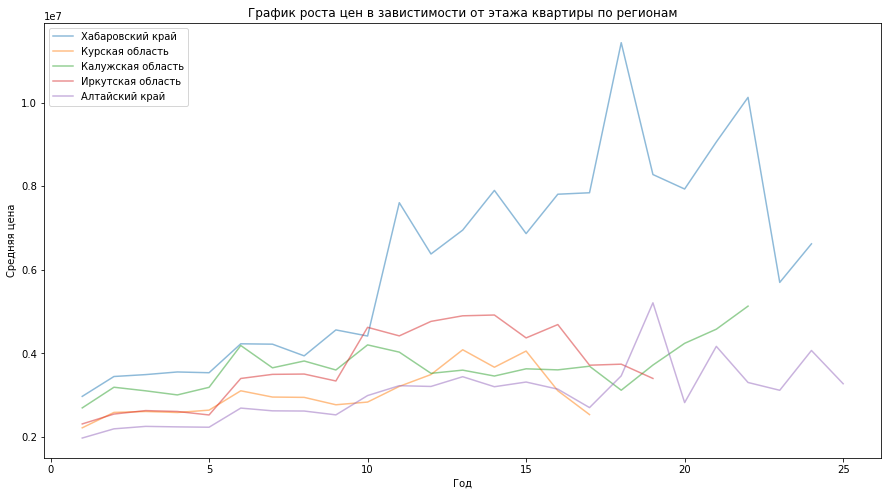

In [502]:
plt.subplots(figsize=(15, 8))
plt.plot(df.query('region_name == "Хабаровский край"').groupby('level')['price'].agg('mean'), alpha = 0.5, label='Хабаровский край')
plt.plot(df.query('region_name == "Курская область"').groupby('level')['price'].agg('mean'), alpha = 0.5, label='Курская область')
plt.plot(df.query('region_name == "Калужская область"').groupby('level')['price'].agg('mean'), alpha = 0.5, label='Калужская область')
plt.plot(df.query('region_name == "Иркутская область"').groupby('level')['price'].agg('mean'), alpha = 0.5, label='Иркутская область')
plt.plot(df.query('region_name == "Алтайский край"').groupby('level')['price'].agg('mean'), alpha = 0.5, label='Алтайский край')
plt.title('График роста цен в завистимости от этажа квартиры по регионам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.legend()
plt.show()

Вывод: Проведя анализ данных в датасете можно заключить, что недвижимость дорожает везде год от года и, что параметры общей площади, количества комнат, этажа квартиры и пр. влияют на изменение цены не зависимо от региона. Вопрос только в масштабе цен. И понятно, что условная квартира в Москве будет стоить дороже квартиры в Иркутске.

## 4.	Постройте модель (любую), предсказывающую цену по входящим параметрам недвижимости?

In [503]:
encoder = OrdinalEncoder(categories=[list(df['region_name'].unique())])
df['region'] = encoder.fit_transform(df[['region_name']])
data = df.copy()
data = data.drop(columns=['region_name'])

In [504]:
data.head()

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,price_by_meter,class_object,year,month,day,region
0,6050000,59.81,30.38,1,8,10,3,82.60,10.80,73244.55,2,2018,2,19,0.00
1,8650000,55.68,37.30,3,5,24,2,69.10,12.00,125180.90,2,2018,2,27,1.00
2,4000000,56.30,44.06,1,5,9,3,66.00,10.00,60606.06,3,2018,2,28,2.00
4,5450000,55.92,37.98,3,13,14,2,60.00,10.00,90833.33,3,2018,3,1,1.00
5,3300000,55.91,37.73,1,4,5,1,32.00,6.00,103125.00,3,2018,3,2,1.00


In [505]:
# выделим целевой признак и разделим датасет на обучающую и тестовую выборки
features = data.drop(['price'], axis=1)
target = data['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                            random_state=23)

In [506]:
# сделаем масштамбирование признаков
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [507]:
# посмотрим на размер выборок
print('Размер обучающей выборки:', features_train.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер обучающей выборки: (2640012, 14)
Размер тестовой выборки: (880004, 14)


In [508]:
%%time

# построим модель линейной регрессии
parameters_lr = {'fit_intercept': [True],
                 'n_jobs': [-1, 0, 1],
                 'normalize': [True, False]}
model_lr = LinearRegression()
grid_lr = GridSearchCV(estimator=model_lr, param_grid=parameters_lr, scoring='neg_mean_absolute_error', cv=5)
grid_lr.fit(features_train, target_train)
best_param_lr = grid_lr.best_params_
mae_lr = cross_val_score(model_lr, 
                              features_train, 
                              target_train, 
                              cv=5,
                              scoring='neg_mean_absolute_error').mean()
print('Лучшие параметры для линейной регрессии:', best_param_lr)
print('\n')
print('Среднее MAE на обучающей выборке:', mae_lr)
print('\n')

Лучшие параметры для линейной регрессии: {'fit_intercept': True, 'n_jobs': -1, 'normalize': False}


Среднее MAE на обучающей выборке: -591022.314179721


CPU times: user 1min 13s, sys: 35.1 s, total: 1min 48s
Wall time: 43.5 s


In [509]:
# используем лучшие параметры модели для ее тестирования
model_lr.set_params(**best_param_lr)
model_lr.fit(features_train, target_train)
predict_lr = model_lr.predict(features_test)
mae_lr_on_test = mean_absolute_error(target_test, predict_lr)
print('MAE модели LinearRegression на тестовой выборке:', mae_lr_on_test)

MAE модели LinearRegression на тестовой выборке: 592455.8859043668


Вывод: Нам удалось построить модель, которая демонстрирует ошибку МАЕ примерно в размере 600 тыс. На тестовых данных результат аналогичен, что не может не радовать: модели удалось избежать переобучения и недообучения. Однако разброс в 600 тыс. при прогнозе слишком велик. Определенно необходимо продолжить работу над приведением данных в датасете к порядку, провести работу по дальнейшему исключению аномалий и логически необъяснимых данных, а также провести устранение в дисбалансе классов, который определенно есть в данных. На текущем этапе величина ошибки слишком высока, если квартира относится к бюджетному или эконом варианту. Однако если цена квартиры более 10 млн., то ошибка составит примерно - 6%.